## Self Organizing Maps

Self-organizing map (SOM) is a form of artificial neural network. It is trained by using
unsupervised learning to generate a two-dimensional presentation of the input metrics.
Therefore, SOM is one algorithm can realize dimensionality reduction. SOM is an appro-
priate tool for visualizing low-dimensional graphs of high-dimensional input data for its
function of preserving the topological properties of the input data space.

## Experiments

Regarding the SOM, we intended to explore the influence of changing inherent variables
of the algorithm. In the first experiment, the number of iterations were set as 500,
1000, and 2000 and the other parameters were fixed as following: OP learning rate =
1.0; Tuning phase (TP) learning rate = 1; TP Neighborhood distance = 1; and Map size
= 20x20. In the second experiment, the number of iterations was fixed as 500, and the
Neighbourhood distance was fixed at 1. While the Map size were set as 10×10, 20×20,
30×30. In the third experiment, the OP steps were fixed in 500 iterations and the TP
Neighborhood distances were set as 1, 10 and 20, while the other variables were not mod-
ified.

## Results

SOM neighborhood weight distance graph, which indicates the distances between neighboring neurons.

## Running a Self-Organizing Map with SOMPY | EXAMPLE

In [2]:
import matplotlib.pylab as plt
import pandas as pd
import numpy as np
from time import time
import sompy

backend module://ipykernel.pylab.backend_inline version unknown


findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0 to DejaVu Sans ('/home/sarai/.virtualenvs/jupyter-notebook/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000


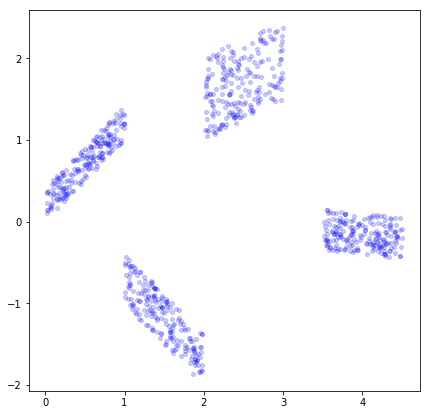

In [3]:
dlen = 200
Data1 = pd.DataFrame(data= 1*np.random.rand(dlen,2))
Data1.values[:,1] = (Data1.values[:,0][:,np.newaxis] + .42*np.random.rand(dlen,1))[:,0]


Data2 = pd.DataFrame(data= 1*np.random.rand(dlen,2)+1)
Data2.values[:,1] = (-1*Data2.values[:,0][:,np.newaxis] + .62*np.random.rand(dlen,1))[:,0]

Data3 = pd.DataFrame(data= 1*np.random.rand(dlen,2)+2)
Data3.values[:,1] = (.5*Data3.values[:,0][:,np.newaxis] + 1*np.random.rand(dlen,1))[:,0]


Data4 = pd.DataFrame(data= 1*np.random.rand(dlen,2)+3.5)
Data4.values[:,1] = (-.1*Data4.values[:,0][:,np.newaxis] + .5*np.random.rand(dlen,1))[:,0]


Data1 = np.concatenate((Data1,Data2,Data3,Data4))

fig = plt.figure()
plt.plot(Data1[:,0],Data1[:,1],'ob',alpha=0.2, markersize=4)
fig.set_size_inches(7,7)

In [4]:
mapsize = [20,20]
som = sompy.SOMFactory.build(Data1, mapsize, mask=None, mapshape='planar', lattice='rect', normalization='var', initialization='pca', neighborhood='gaussian', training='batch', name='sompy')  # this will use the default parameters, but i can change the initialization and neighborhood methods
som.train(n_job=1, verbose='debug')  # verbose='debug' will print more, and verbose=None wont print anything

 Training...
--------------------------------------------------------------
 details: 
      > data len is 800 and data dimension is 2
      > map size is 20,20
      > array size in log10 scale is 5.8061799739838875
      > number of jobs in parallel: 1
 -------------------------------------------------------------

 pca_linear_initialization took: 0.033000 seconds
 Rough training...
 radius_ini: 3.000000 , radius_final: 1.000000, trainlen: 15

 find_bmu took: 0.108000 seconds
 update_codebook_voronoi took: 0.011000 seconds
 epoch: 1 ---> elapsed time:  0.160000, quantization error: 0.232653

 find_bmu took: 0.115000 seconds
 update_codebook_voronoi took: 0.002000 seconds
 epoch: 2 ---> elapsed time:  0.127000, quantization error: 0.115240

 find_bmu took: 0.107000 seconds
 update_codebook_voronoi took: 0.004000 seconds
 epoch: 3 ---> elapsed time:  0.121000, quantization error: 0.080780

 find_bmu took: 0.102000 seconds
 update_codebook_voronoi took: 0.004000 seconds
 epoch: 4 ---> e

findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=12.0 to DejaVu Sans ('/home/sarai/.virtualenvs/jupyter-notebook/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000
findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=9.6 to DejaVu Sans ('/home/sarai/.virtualenvs/jupyter-notebook/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000
findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=8.0 to DejaVu Sans ('/home/sarai/.virtualenvs/jupyter-notebook/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000


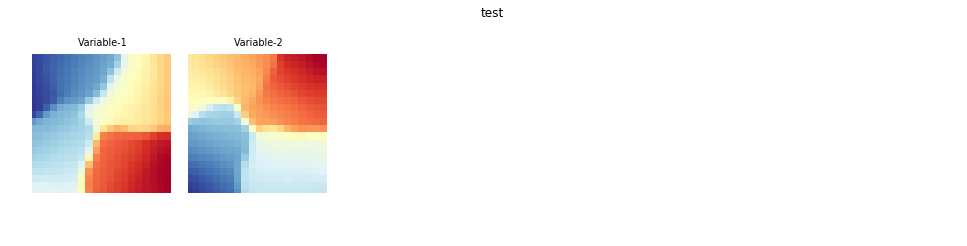

In [5]:
v = sompy.mapview.View2DPacked(50, 50, 'test',text_size=8)  
# could be done in a one-liner: sompy.mapview.View2DPacked(300, 300, 'test').show(som)
v.show(som, what='codebook', which_dim=[0,1], cmap=None, col_sz=6) #which_dim='all' default
# v.save('2d_packed_test')

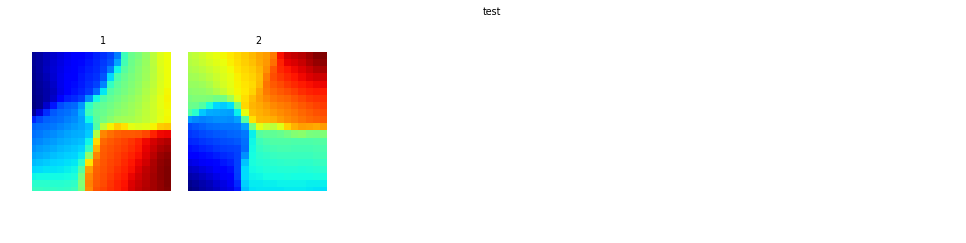

In [6]:
som.component_names = ['1','2']
v = sompy.mapview.View2DPacked(50, 50, 'test',text_size=8)  
v.show(som, what='codebook', which_dim='all', cmap='jet', col_sz=6) #which_dim='all' default

## Dealing with Actual Data

In [7]:
data_location = '/home/sarai/Documents/UPE/tcc/hybrid-approach/5_gait_symmetry_ratios_and_2_kinematic_features_from_180_samples2.csv'
data = pd.read_csv(data_location)
# data = data.drop(['Number', 'Gender', 'Age'], axis=1)
print(data.head())

data = data.values

      Rst     Rsw    RssR    RssL      Rs  ACT[s]  Cadence
0  1.0547  1.0581  1.4835  1.4884  0.9967  0.7080   2.8249
1  1.3552  0.9913  1.7594  1.2870  1.3671  0.7633   2.6201
2  1.0082  1.0353  1.3977  1.4353  0.9738  0.6920   2.8902
3  0.9524  0.9363  1.5200  1.4944  1.0171  0.6893   2.9014
4  0.8895  1.1240  1.3190  1.6667  0.7914  0.7307   2.7372


# Num of iterations = 500

In [14]:
mapsize = [20,20]
som = sompy.SOMFactory.build(data, mapsize, mask=None, mapshape='planar', lattice='rect', normalization='var', initialization='pca', neighborhood='gaussian', training='batch', name='sompy')  # this will use the default parameters, but i can change the initialization and neighborhood methods
som.train(n_job=1, verbose='debug', train_rough_len=500)

 Training...
--------------------------------------------------------------
 details: 
      > data len is 180 and data dimension is 7
      > map size is 20,20
      > array size in log10 scale is 5.702430536445525
      > number of jobs in parallel: 1
 -------------------------------------------------------------

 pca_linear_initialization took: 0.021000 seconds
 Rough training...
 radius_ini: 3.000000 , radius_final: 1.000000, trainlen: 500

 find_bmu took: 0.104000 seconds
 update_codebook_voronoi took: 0.005000 seconds
 epoch: 1 ---> elapsed time:  0.123000, quantization error: 1.138843

 find_bmu took: 0.102000 seconds
 update_codebook_voronoi took: 0.005000 seconds
 epoch: 2 ---> elapsed time:  0.119000, quantization error: 1.073867

 find_bmu took: 0.107000 seconds
 update_codebook_voronoi took: 0.005000 seconds
 epoch: 3 ---> elapsed time:  0.125000, quantization error: 1.048154

 find_bmu took: 0.102000 seconds
 update_codebook_voronoi took: 0.005000 seconds
 epoch: 4 ---> e

 find_bmu took: 0.108000 seconds
 update_codebook_voronoi took: 0.006000 seconds
 epoch: 52 ---> elapsed time:  0.137000, quantization error: 0.947593

 find_bmu took: 0.108000 seconds
 update_codebook_voronoi took: 0.011000 seconds
 epoch: 53 ---> elapsed time:  0.129000, quantization error: 0.946701

 find_bmu took: 0.112000 seconds
 update_codebook_voronoi took: 0.004000 seconds
 epoch: 54 ---> elapsed time:  0.133000, quantization error: 0.946029

 find_bmu took: 0.108000 seconds
 update_codebook_voronoi took: 0.006000 seconds
 epoch: 55 ---> elapsed time:  0.127000, quantization error: 0.945358

 find_bmu took: 0.107000 seconds
 update_codebook_voronoi took: 0.017000 seconds
 epoch: 56 ---> elapsed time:  0.142000, quantization error: 0.944688

 find_bmu took: 0.108000 seconds
 update_codebook_voronoi took: 0.012000 seconds
 epoch: 57 ---> elapsed time:  0.136000, quantization error: 0.944019

 find_bmu took: 0.111000 seconds
 update_codebook_voronoi took: 0.006000 seconds
 epoch:

 find_bmu took: 0.105000 seconds
 update_codebook_voronoi took: 0.003000 seconds
 epoch: 106 ---> elapsed time:  0.135000, quantization error: 0.905667

 find_bmu took: 0.115000 seconds
 update_codebook_voronoi took: 0.002000 seconds
 epoch: 107 ---> elapsed time:  0.127000, quantization error: 0.904259

 find_bmu took: 0.104000 seconds
 update_codebook_voronoi took: 0.006000 seconds
 epoch: 108 ---> elapsed time:  0.121000, quantization error: 0.903452

 find_bmu took: 0.112000 seconds
 update_codebook_voronoi took: 0.006000 seconds
 epoch: 109 ---> elapsed time:  0.126000, quantization error: 0.902681

 find_bmu took: 0.108000 seconds
 update_codebook_voronoi took: 0.004000 seconds
 epoch: 110 ---> elapsed time:  0.130000, quantization error: 0.901983

 find_bmu took: 0.104000 seconds
 update_codebook_voronoi took: 0.010000 seconds
 epoch: 111 ---> elapsed time:  0.132000, quantization error: 0.900681

 find_bmu took: 0.113000 seconds
 update_codebook_voronoi took: 0.003000 seconds
 

 find_bmu took: 0.116000 seconds
 update_codebook_voronoi took: 0.006000 seconds
 epoch: 160 ---> elapsed time:  0.131000, quantization error: 0.862418

 find_bmu took: 0.109000 seconds
 update_codebook_voronoi took: 0.004000 seconds
 epoch: 161 ---> elapsed time:  0.125000, quantization error: 0.861682

 find_bmu took: 0.102000 seconds
 update_codebook_voronoi took: 0.006000 seconds
 epoch: 162 ---> elapsed time:  0.119000, quantization error: 0.860946

 find_bmu took: 0.108000 seconds
 update_codebook_voronoi took: 0.006000 seconds
 epoch: 163 ---> elapsed time:  0.124000, quantization error: 0.860131

 find_bmu took: 0.102000 seconds
 update_codebook_voronoi took: 0.014000 seconds
 epoch: 164 ---> elapsed time:  0.129000, quantization error: 0.859395

 find_bmu took: 0.102000 seconds
 update_codebook_voronoi took: 0.012000 seconds
 epoch: 165 ---> elapsed time:  0.127000, quantization error: 0.858654

 find_bmu took: 0.105000 seconds
 update_codebook_voronoi took: 0.017000 seconds
 

 find_bmu took: 0.105000 seconds
 update_codebook_voronoi took: 0.006000 seconds
 epoch: 214 ---> elapsed time:  0.123000, quantization error: 0.808202

 find_bmu took: 0.103000 seconds
 update_codebook_voronoi took: 0.012000 seconds
 epoch: 215 ---> elapsed time:  0.145000, quantization error: 0.807346

 find_bmu took: 0.106000 seconds
 update_codebook_voronoi took: 0.004000 seconds
 epoch: 216 ---> elapsed time:  0.126000, quantization error: 0.806536

 find_bmu took: 0.102000 seconds
 update_codebook_voronoi took: 0.003000 seconds
 epoch: 217 ---> elapsed time:  0.127000, quantization error: 0.805728

 find_bmu took: 0.107000 seconds
 update_codebook_voronoi took: 0.002000 seconds
 epoch: 218 ---> elapsed time:  0.128000, quantization error: 0.804921

 find_bmu took: 0.102000 seconds
 update_codebook_voronoi took: 0.002000 seconds
 epoch: 219 ---> elapsed time:  0.119000, quantization error: 0.804116

 find_bmu took: 0.102000 seconds
 update_codebook_voronoi took: 0.006000 seconds
 

 find_bmu took: 0.102000 seconds
 update_codebook_voronoi took: 0.002000 seconds
 epoch: 268 ---> elapsed time:  0.114000, quantization error: 0.754886

 find_bmu took: 0.106000 seconds
 update_codebook_voronoi took: 0.008000 seconds
 epoch: 269 ---> elapsed time:  0.129000, quantization error: 0.753890

 find_bmu took: 0.109000 seconds
 update_codebook_voronoi took: 0.006000 seconds
 epoch: 270 ---> elapsed time:  0.125000, quantization error: 0.753005

 find_bmu took: 0.105000 seconds
 update_codebook_voronoi took: 0.012000 seconds
 epoch: 271 ---> elapsed time:  0.131000, quantization error: 0.752122

 find_bmu took: 0.108000 seconds
 update_codebook_voronoi took: 0.006000 seconds
 epoch: 272 ---> elapsed time:  0.128000, quantization error: 0.751239

 find_bmu took: 0.109000 seconds
 update_codebook_voronoi took: 0.006000 seconds
 epoch: 273 ---> elapsed time:  0.127000, quantization error: 0.750123

 find_bmu took: 0.106000 seconds
 update_codebook_voronoi took: 0.006000 seconds
 

 find_bmu took: 0.113000 seconds
 update_codebook_voronoi took: 0.007000 seconds
 epoch: 322 ---> elapsed time:  0.128000, quantization error: 0.696601

 find_bmu took: 0.111000 seconds
 update_codebook_voronoi took: 0.013000 seconds
 epoch: 323 ---> elapsed time:  0.135000, quantization error: 0.695729

 find_bmu took: 0.102000 seconds
 update_codebook_voronoi took: 0.004000 seconds
 epoch: 324 ---> elapsed time:  0.123000, quantization error: 0.694668

 find_bmu took: 0.104000 seconds
 update_codebook_voronoi took: 0.006000 seconds
 epoch: 325 ---> elapsed time:  0.120000, quantization error: 0.693531

 find_bmu took: 0.115000 seconds
 update_codebook_voronoi took: 0.006000 seconds
 epoch: 326 ---> elapsed time:  0.130000, quantization error: 0.692572

 find_bmu took: 0.106000 seconds
 update_codebook_voronoi took: 0.005000 seconds
 epoch: 327 ---> elapsed time:  0.124000, quantization error: 0.691610

 find_bmu took: 0.107000 seconds
 update_codebook_voronoi took: 0.011000 seconds
 

 find_bmu took: 0.105000 seconds
 update_codebook_voronoi took: 0.006000 seconds
 epoch: 376 ---> elapsed time:  0.139000, quantization error: 0.637682

 find_bmu took: 0.106000 seconds
 update_codebook_voronoi took: 0.009000 seconds
 epoch: 377 ---> elapsed time:  0.128000, quantization error: 0.636718

 find_bmu took: 0.102000 seconds
 update_codebook_voronoi took: 0.004000 seconds
 epoch: 378 ---> elapsed time:  0.128000, quantization error: 0.635757

 find_bmu took: 0.108000 seconds
 update_codebook_voronoi took: 0.007000 seconds
 epoch: 379 ---> elapsed time:  0.135000, quantization error: 0.634794

 find_bmu took: 0.105000 seconds
 update_codebook_voronoi took: 0.013000 seconds
 epoch: 380 ---> elapsed time:  0.128000, quantization error: 0.633729

 find_bmu took: 0.101000 seconds
 update_codebook_voronoi took: 0.011000 seconds
 epoch: 381 ---> elapsed time:  0.124000, quantization error: 0.632765

 find_bmu took: 0.118000 seconds
 update_codebook_voronoi took: 0.006000 seconds
 

 find_bmu took: 0.102000 seconds
 update_codebook_voronoi took: 0.011000 seconds
 epoch: 430 ---> elapsed time:  0.126000, quantization error: 0.569287

 find_bmu took: 0.108000 seconds
 update_codebook_voronoi took: 0.006000 seconds
 epoch: 431 ---> elapsed time:  0.122000, quantization error: 0.568129

 find_bmu took: 0.103000 seconds
 update_codebook_voronoi took: 0.008000 seconds
 epoch: 432 ---> elapsed time:  0.130000, quantization error: 0.566268

 find_bmu took: 0.114000 seconds
 update_codebook_voronoi took: 0.012000 seconds
 epoch: 433 ---> elapsed time:  0.143000, quantization error: 0.564975

 find_bmu took: 0.106000 seconds
 update_codebook_voronoi took: 0.002000 seconds
 epoch: 434 ---> elapsed time:  0.129000, quantization error: 0.563434

 find_bmu took: 0.102000 seconds
 update_codebook_voronoi took: 0.007000 seconds
 epoch: 435 ---> elapsed time:  0.124000, quantization error: 0.562267

 find_bmu took: 0.108000 seconds
 update_codebook_voronoi took: 0.012000 seconds
 

 find_bmu took: 0.107000 seconds
 update_codebook_voronoi took: 0.003000 seconds
 epoch: 484 ---> elapsed time:  0.124000, quantization error: 0.488849

 find_bmu took: 0.102000 seconds
 update_codebook_voronoi took: 0.007000 seconds
 epoch: 485 ---> elapsed time:  0.119000, quantization error: 0.483804

 find_bmu took: 0.109000 seconds
 update_codebook_voronoi took: 0.003000 seconds
 epoch: 486 ---> elapsed time:  0.131000, quantization error: 0.480924

 find_bmu took: 0.102000 seconds
 update_codebook_voronoi took: 0.006000 seconds
 epoch: 487 ---> elapsed time:  0.127000, quantization error: 0.479427

 find_bmu took: 0.108000 seconds
 update_codebook_voronoi took: 0.007000 seconds
 epoch: 488 ---> elapsed time:  0.134000, quantization error: 0.477928

 find_bmu took: 0.101000 seconds
 update_codebook_voronoi took: 0.003000 seconds
 epoch: 489 ---> elapsed time:  0.119000, quantization error: 0.476427

 find_bmu took: 0.112000 seconds
 update_codebook_voronoi took: 0.005000 seconds
 

 epoch: 37 ---> elapsed time:  0.120000, quantization error: 0.456313

 find_bmu took: 0.109000 seconds
 update_codebook_voronoi took: 0.005000 seconds
 epoch: 38 ---> elapsed time:  0.128000, quantization error: 0.456313

 find_bmu took: 0.101000 seconds
 update_codebook_voronoi took: 0.007000 seconds
 epoch: 39 ---> elapsed time:  0.118000, quantization error: 0.456313

 find_bmu took: 0.109000 seconds
 update_codebook_voronoi took: 0.002000 seconds
 epoch: 40 ---> elapsed time:  0.121000, quantization error: 0.456313

 find_bmu took: 0.102000 seconds
 update_codebook_voronoi took: 0.004000 seconds
 epoch: 41 ---> elapsed time:  0.128000, quantization error: 0.456313

 find_bmu took: 0.110000 seconds
 update_codebook_voronoi took: 0.004000 seconds
 epoch: 42 ---> elapsed time:  0.129000, quantization error: 0.456313

 find_bmu took: 0.103000 seconds
 update_codebook_voronoi took: 0.011000 seconds
 epoch: 43 ---> elapsed time:  0.130000, quantization error: 0.456313

 find_bmu took: 0

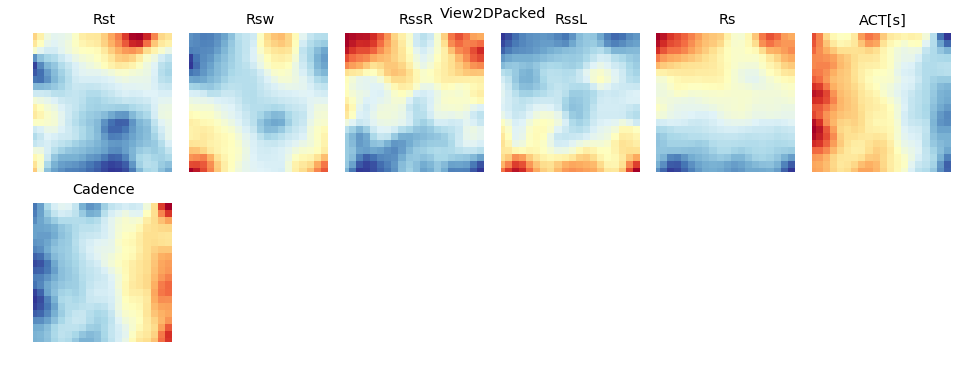

In [16]:
som.component_names = ['Rst', 'Rsw', 'RssR', 'RssL', 'Rs', 'ACT[s]', 'Cadence']
v  = sompy.mapview.View2DPacked(5, 5, 'View2DPacked',text_size=12)
v.show(som, what='codebook', cmap=None, col_sz=6) #which_dim='all' default
# v.save('2d_packed_test')

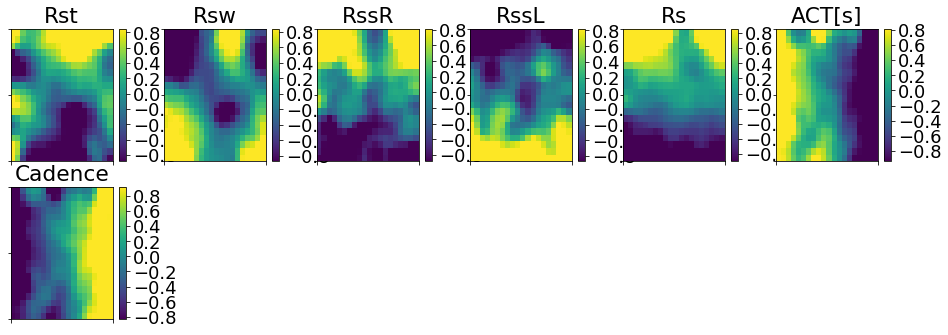

In [18]:
v  = sompy.mapview.View2D(5, 5, 'View2D',text_size=18)  
v.show(som, what='codebook', cmap=None, col_sz=6) #which_dim='all' default

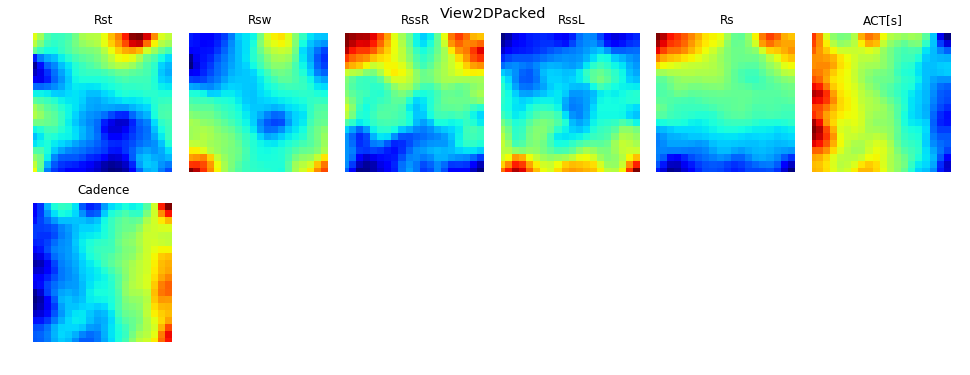

In [17]:
som.component_names = ['Rst', 'Rsw', 'RssR', 'RssL', 'Rs', 'ACT[s]', 'Cadence']
v = sompy.mapview.View2DPacked(50, 50, 'View2DPacked',text_size=10)  
v.show(som, what='codebook', which_dim='all', cmap='jet', col_sz=6)

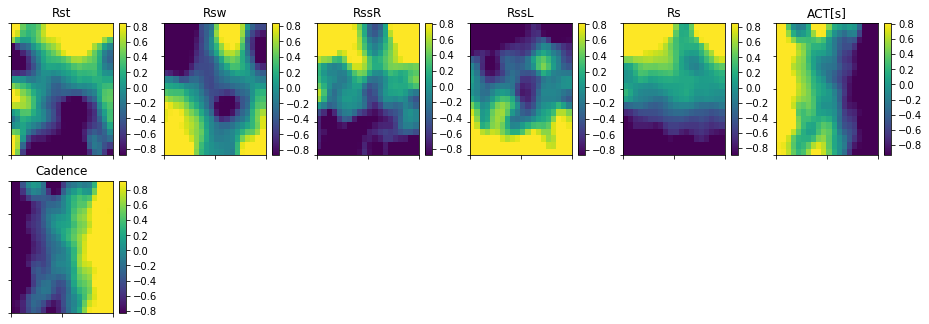

In [19]:
som.component_names = ['Rst', 'Rsw', 'RssR', 'RssL', 'Rs', 'ACT[s]', 'Cadence']
v = sompy.mapview.View2D(5, 5, 'test',text_size=10)  
v.show(som, what='codebook', which_dim='all', cmap='jet', col_sz=6) #which_dim='all' default

## SOM and KMEANS (will be replaced by CMEANS)

/home/sarai/.virtualenvs/hybrid-approach/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


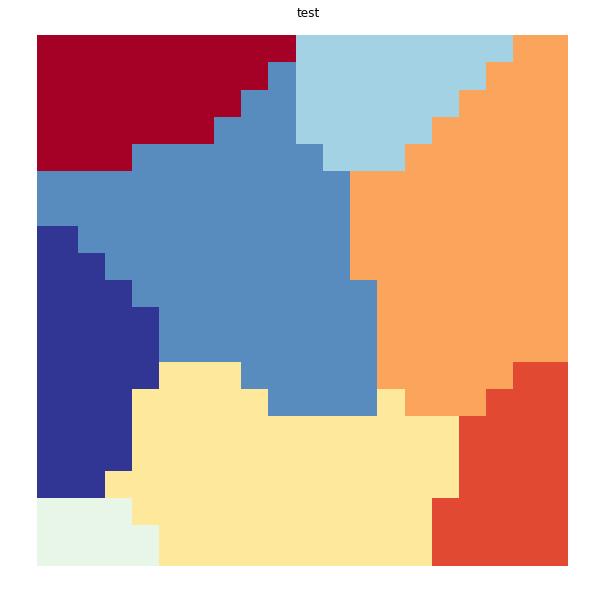

In [20]:
v  = sompy.mapview.View2DPacked(5, 5, 'test',text_size=12)  
som.cluster()
v.show(som, what='cluster')

/home/sarai/.virtualenvs/hybrid-approach/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


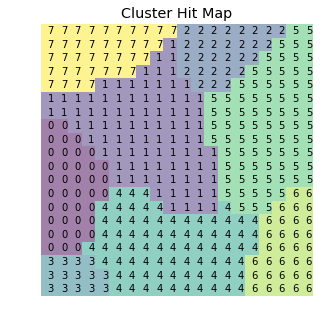

array([[  0,   0,   0],
       [  0,   1,   1],
       [  0,   2,   2],
       ...,
       [ 19,  17, 397],
       [ 19,  18, 398],
       [ 19,  19, 399]])

In [22]:
hitmap  = sompy.hitmap.HitMapView(5,5,"Cluster Hit Map",text_size=14)
hitmap.show(som)

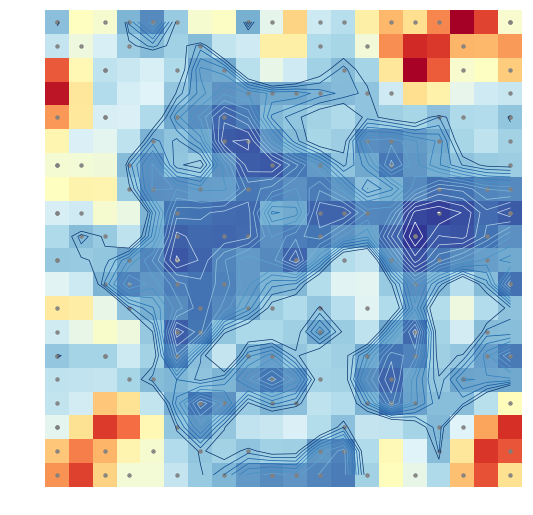

([], array([[0.35820552, 0.56865444, 0.54618487, 0.3377933 , 0.26839341,
         0.37699818, 0.5446766 , 0.56167583, 0.32923888, 0.5022005 ,
         0.67156411, 0.45773254, 0.4215409 , 0.60864366, 0.71663057,
         0.6507339 , 0.78644347, 0.984196  , 0.87287989, 0.55016238],
        [0.44558767, 0.52543827, 0.47571485, 0.3832829 , 0.35014975,
         0.39109817, 0.35045474, 0.44192074, 0.45950649, 0.6096672 ,
         0.61063199, 0.41130954, 0.40023409, 0.53250755, 0.77545379,
         0.91085076, 0.88989994, 0.72117073, 0.71852563, 0.76021708],
        [0.84481179, 0.58785877, 0.43522312, 0.45218468, 0.47633   ,
         0.4082521 , 0.30722486, 0.31955115, 0.42441704, 0.50943343,
         0.46122811, 0.39026331, 0.35048501, 0.39537179, 0.63412938,
         0.97732682, 0.84000979, 0.5496867 , 0.5659341 , 0.68352738],
        [0.94448353, 0.63246778, 0.41647214, 0.47088197, 0.48862999,
         0.36980338, 0.31936275, 0.28246012, 0.29555019, 0.31537859,
         0.3156874 , 0.3338

In [24]:
umat = sompy.umatrix.UMatrixView(50, 50, 'umatrix', show_axis=True, text_size=8, show_text=True)
umat.show(som)

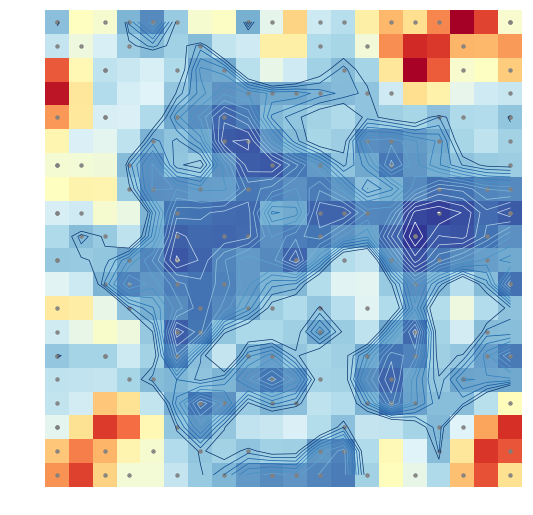

In [33]:
u  = sompy.umatrix.UMatrixView(100,100,"Unified Distance Matrix", show_axis=True, text_size=8, show_text=True)

#This is the Umat value
UMAT  = u.build_u_matrix(som, distance=1, row_normalized=False)

#Here you have Umatrix plus its render
UMAT = u.show(som, distance2=1, row_normalized=False, show_data=True, contooor=True, blob=False)

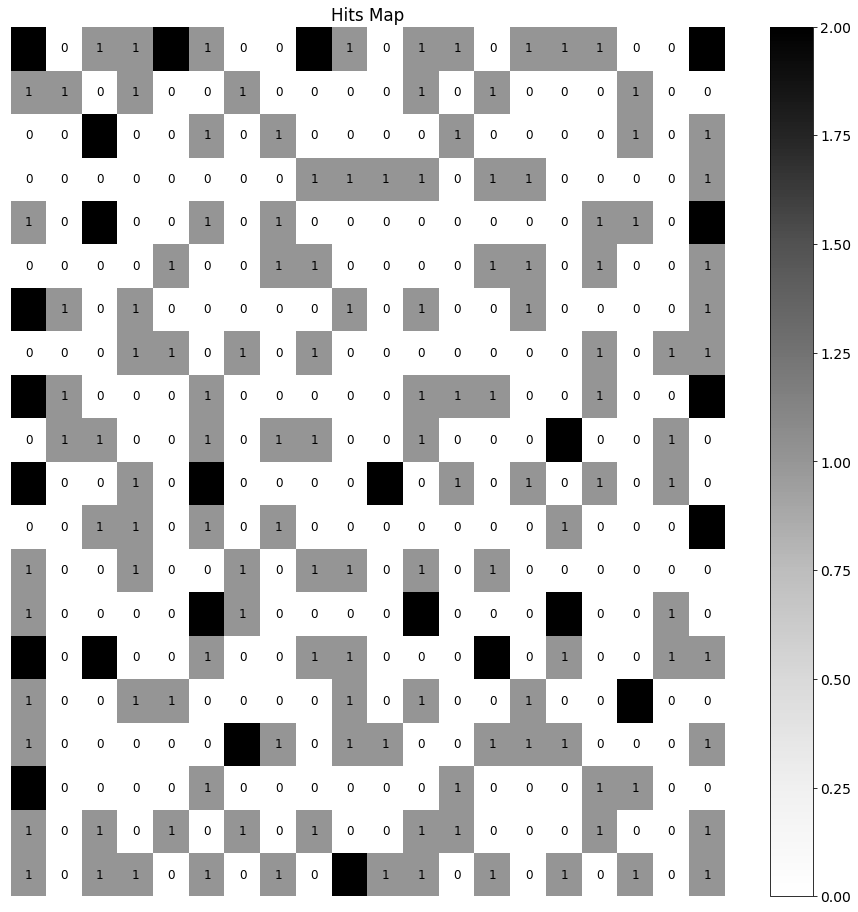

In [32]:
from sompy.visualization.bmuhits import BmuHitsView
bmuhits  = BmuHitsView(100,100,"Hits Map",text_size=14)
bmuhits.show(som, anotate=True, onlyzeros=False, labelsize=12, cmap="Greys", logaritmic=False)